# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

### Exponential Smoothing methods
#####  Exponential smoothing methods consist of flattening time series data. 
##### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.
##### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
##### One or more parameters control how fast the weights decay.
##### These parameters have values between 0 and 1


In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

## Read the data.

In [2]:
df = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
rcParams['figure.figsize'] = 15,8

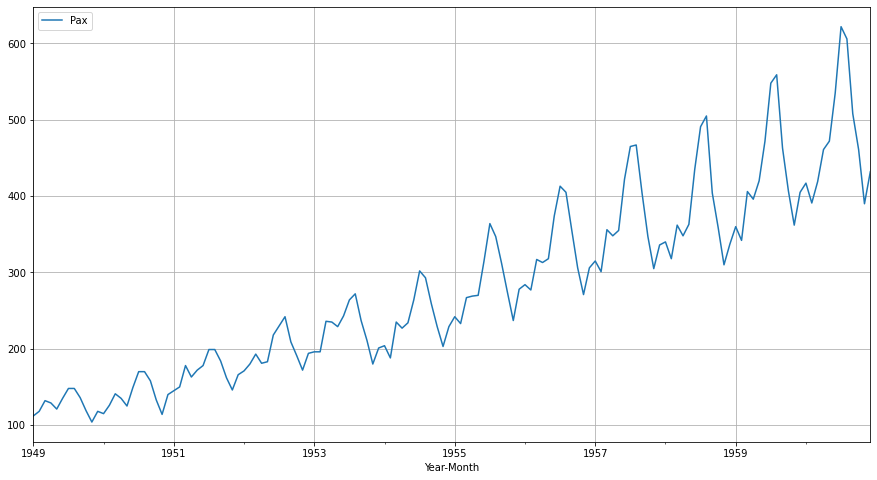

In [4]:
df.plot(grid=True);

## Split the data into training and test. The data from 1957 should be training data.

In [5]:
train             = df[df.index<'1957'] 
test              = df[df.index>'1957']

In [6]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-08-01,405
1956-09-01,355
1956-10-01,306


Test Data


,Pax
Year-Month,
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347


### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [7]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [8]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [9]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.95399055092484,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [10]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-01-01    305.999999
1957-02-01    305.999999
1957-03-01    305.999999
1957-04-01    305.999999
1957-05-01    305.999999
1957-06-01    305.999999
1957-07-01    305.999999
1957-08-01    305.999999
1957-09-01    305.999999
1957-10-01    305.999999
1957-11-01    305.999999
1957-12-01    305.999999
1958-01-01    305.999999
1958-02-01    305.999999
1958-03-01    305.999999
1958-04-01    305.999999
1958-05-01    305.999999
1958-06-01    305.999999
1958-07-01    305.999999
1958-08-01    305.999999
1958-09-01    305.999999
1958-10-01    305.999999
1958-11-01    305.999999
1958-12-01    305.999999
1959-01-01    305.999999
1959-02-01    305.999999
1959-03-01    305.999999
1959-04-01    305.999999
1959-05-01    305.999999
1959-06-01    305.999999
1959-07-01    305.999999
1959-08-01    305.999999
1959-09-01    305.999999
1959-10-01    305.999999
1959-11-01    305.999999
1959-12-01    305.999999
1960-01-01    305.999999
1960-02-01    305.999999
1960-03-01    305.999999
1960-04-01    305.999999


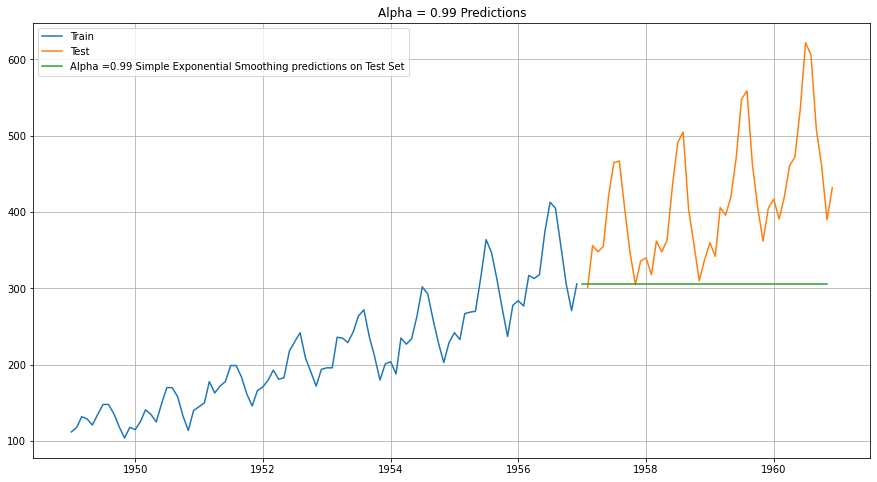

In [11]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [12]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [13]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 134.0068278168285
SES RMSE (calculated using statsmodels): 134.0068278168285


In [14]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [15]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.0606060606060694, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1957-01-01    307.895780
1957-02-01    309.955346
1957-03-01    312.014911
1957-04-01    314.074477
1957-05-01    316.134042
1957-06-01    318.193608
1957-07-01    320.253173
1957-08-01    322.312739
1957-09-01    324.372304
1957-10-01    326.431870
1957-11-01    328.491436
1957-12-01    330.551001
1958-01-01    332.610567
1958-02-01    334.670132
1958-03-01    336.729698
1958-04-01    338.789263
1958-05-01    340.848829
1958-06-01    342.908395
1958-07-01    344.967960
1958-08-01    347.027526
1958-09-01    349.087091
1958-10-01    351.146657
1958-11-01    353.206222
1958-12-01    355.265788
1959-01-01    357.325353
1959-02-01    359.384919
1959-03-01    361.444485
1959-04-01    363.504050
1959-05-01    365.563616
1959-06-01    367.623181
1959-07-01    369.682747
1959-08-01    371.742312
1959-09-01    373.801878
1959-10-01    375.861444
1959-11-01    377.921009
1959-12-01    379.980575
1960-01-01    382.040140
1960-02-01    384.099706
1960-03-01    386.159271
1960-04-01    388.218837


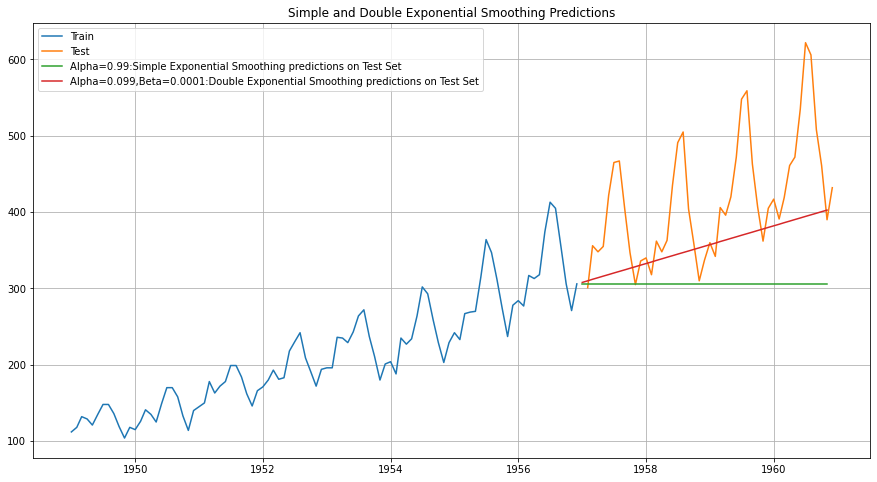

In [17]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [18]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 89.74572192888138


In [19]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",89.745722


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [20]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.2546483570878885, 'smoothing_trend': 8.411774259305766e-12, 'smoothing_seasonal': 0.7453516428892357, 'damping_trend': nan, 'initial_level': 118.76841013859445, 'initial_trend': 2.332830152885944, 'initial_seasons': array([ -9.10156319,  -3.50406003,   8.96983821,   3.69740383,
        -5.06824307,   9.0308772 ,  21.24330835,  18.81862566,
         4.68932241, -14.1153608 , -28.55479694, -11.94777572]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [21]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1957-01-01    319.235246
1957-02-01    311.528357
1957-03-01    350.278659
1957-04-01    346.984945
1957-05-01    351.844989
1957-06-01    403.925662
1957-07-01    440.566741
1957-08-01    427.446405
1957-09-01    376.628089
1957-10-01    329.767420
1957-11-01    296.561189
1957-12-01    341.114647
1958-01-01    347.229207
1958-02-01    339.522319
1958-03-01    378.272621
1958-04-01    374.978907
1958-05-01    379.838951
1958-06-01    431.919624
1958-07-01    468.560703
1958-08-01    455.440367
1958-09-01    404.622050
1958-10-01    357.761381
1958-11-01    324.555151
1958-12-01    369.108609
1959-01-01    375.223169
1959-02-01    367.516281
1959-03-01    406.266583
1959-04-01    402.972869
1959-05-01    407.832912
1959-06-01    459.913586
1959-07-01    496.554665
1959-08-01    483.434329
1959-09-01    432.616012
1959-10-01    385.755343
1959-11-01    352.549113
1959-12-01    397.102571
1960-01-01    403.217131
1960-02-01    395.510242
1960-03-01    434.260545
1960-04-01    430.966830


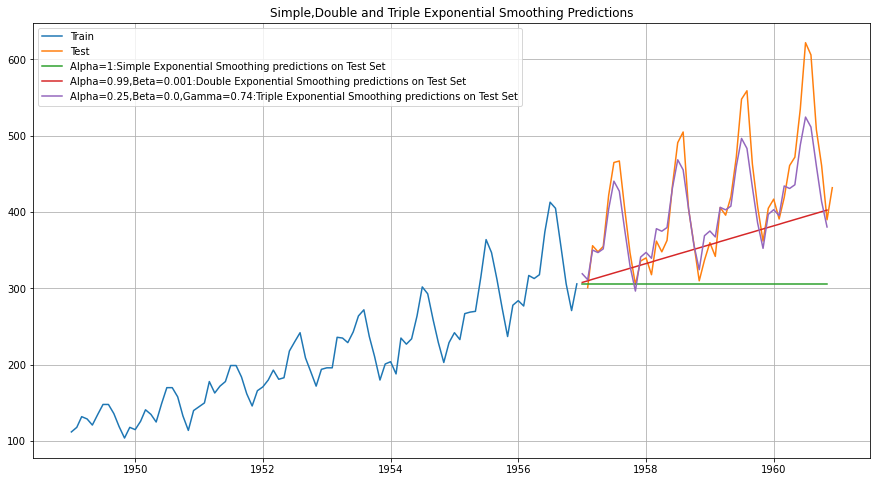

In [23]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [24]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 45.469191124468175


In [25]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",89.745722
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",45.469191


### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [26]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.74122349736698, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 109.54439624762993, 'initial_trend': 2.0100762473424982, 'initial_seasons': array([1.01453552, 0.9927355 , 1.13793623, 1.09961416, 1.09239682,
       1.23237661, 1.36203811, 1.33295193, 1.17157707, 1.01779626,
       0.88465997, 1.00019223]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [27]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1957-01-01    312.899560
1957-02-01    308.171547
1957-03-01    355.533060
1957-04-01    345.770145
1957-05-01    345.696478
1957-06-01    392.471215
1957-07-01    436.501917
1957-08-01    429.859801
1957-09-01    380.173448
1957-10-01    332.317859
1957-11-01    290.626129
1957-12-01    330.590939
1958-01-01    337.371085
1958-02-01    332.117236
1958-03-01    382.981123
1958-04-01    372.293845
1958-05-01    372.046089
1958-06-01    422.197266
1958-07-01    469.355523
1958-08-01    462.011822
1958-09-01    408.432958
1958-10-01    356.868036
1958-11-01    311.964936
1958-12-01    354.716490
1959-01-01    361.842610
1959-02-01    356.062924
1959-03-01    410.429187
1959-04-01    398.817544
1959-05-01    398.395700
1959-06-01    451.923318
1959-07-01    502.209128
1959-08-01    494.163842
1959-09-01    436.692469
1959-10-01    381.418213
1959-11-01    333.303744
1959-12-01    378.842042
1960-01-01    386.314135
1960-02-01    380.008613
1960-03-01    437.877250
1960-04-01    425.341244


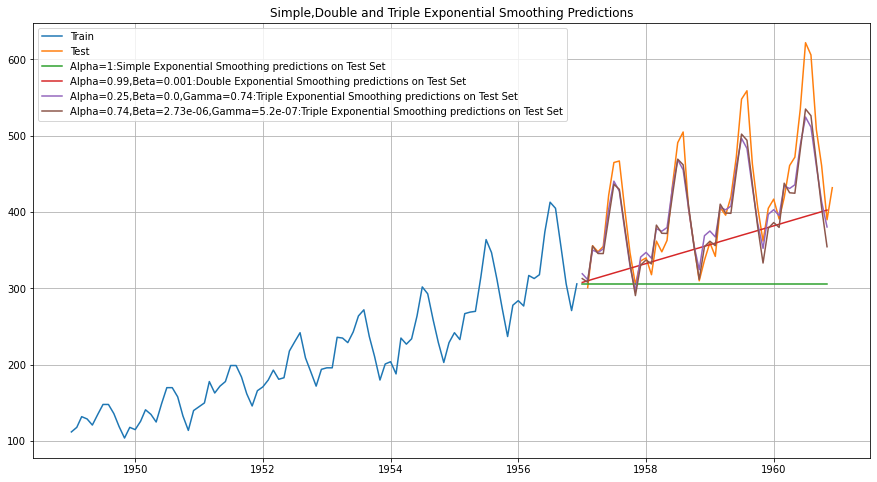

In [28]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [58]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 50.203638255153905


In [60]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",89.745722
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",45.469076
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",50.203638


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

# END